In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [34]:
dataset = pd.read_csv("Angka_ketersediaan_energi.csv")

In [35]:
# Hapus nilai kosong
dataset.dropna(inplace=True)

In [36]:
# Buat label kelas berdasarkan ketersediaan energi
# 1 jika ≥ 2400, 0 jika < 2400
dataset['Kelas'] = dataset['Ketersediaan Energi'].apply(lambda x: 1 if x >= 2400 else 0)

In [37]:
# Ambil fitur dan label
X = dataset[['Ketersediaan Energi Nabati', 'Ketersediaan Energi Hewani']].values
y = dataset['Kelas'].values

In [38]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
# Standarisasi fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Inisialisasi dan latih model Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
# Prediksi
y_pred = classifier.predict(X_test)

In [42]:
# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 2  2]
 [ 0 39]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.95      1.00      0.97        39

    accuracy                           0.95        43
   macro avg       0.98      0.75      0.82        43
weighted avg       0.96      0.95      0.95        43



<ipython-input-43-fb4dca0edfd0>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


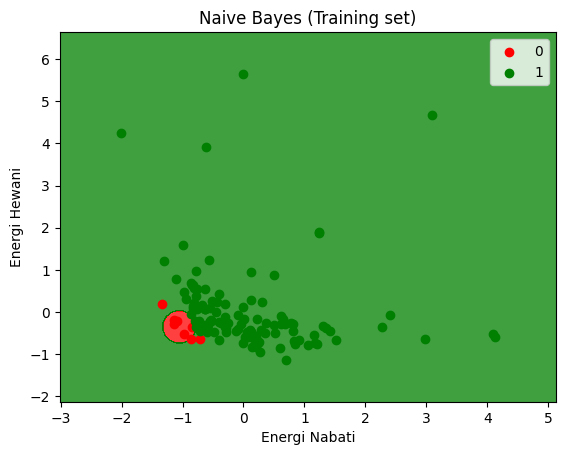

In [43]:
# Visualisasi hasil (Training set)
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
    np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01)
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Energi Nabati')
plt.ylabel('Energi Hewani')
plt.legend()
plt.show()

<ipython-input-44-31fd8cd33867>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


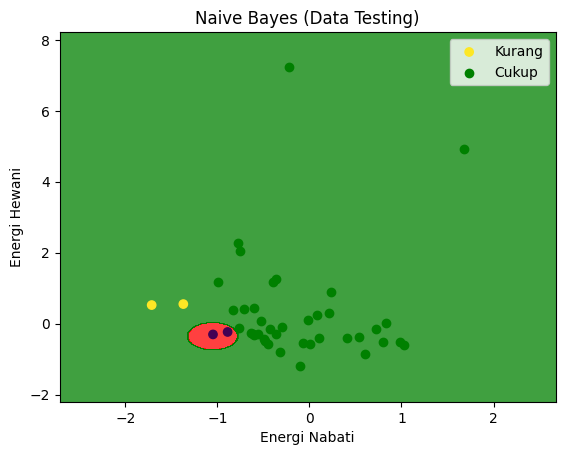

In [44]:
# 9. Visualisasi (data testing)
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label='Cukup' if j == 1 else 'Kurang')
plt.title('Naive Bayes (Data Testing)')
plt.xlabel('Energi Nabati')
plt.ylabel('Energi Hewani')
plt.legend()
plt.show()